<a href="https://colab.research.google.com/github/iqrasaifi/Assignment-DataAnalysis/blob/master/Assignment_3_Iqra_Saifi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [405]:
df=pd.read_csv('/content/dataset_model.csv', sep=',')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df.shape

(614, 13)

In [0]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [0]:
# Numeric Columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History']


In [0]:
# Non-numeric Columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'Property_Area' 'Loan_Status']


# Perform Exploratory Data Analysis , Data Cleaning & Feature Engg on the Training dataset

**1. Idenitfy & Remove the field that is providing only unique information about records .Capture it in another dataframe**

In [0]:
for i in df.columns:
  if(df[i].is_unique):
    df=df.drop(i,axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [0]:
df.shape

(614, 12)

In [0]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**2. Identifying Continous & Categorical Columns**

In [0]:
print('Categorical Columns are:')
for i in df.columns:
  if(len(df[i].unique())<15):
    print(i)

Categorical Columns are:
Gender
Married
Dependents
Education
Self_Employed
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


In [0]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print('Continuous Columns are:')
for i in numeric_cols:
  if(len(df[i].unique())>15):
    print(i)

Continuous Columns are:
ApplicantIncome
CoapplicantIncome
LoanAmount


**3. Performing Uni-variate Analysis with Plots.Record your Observations**

Histgram plots for numeric columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f314e13d208>,
      dtype=object)

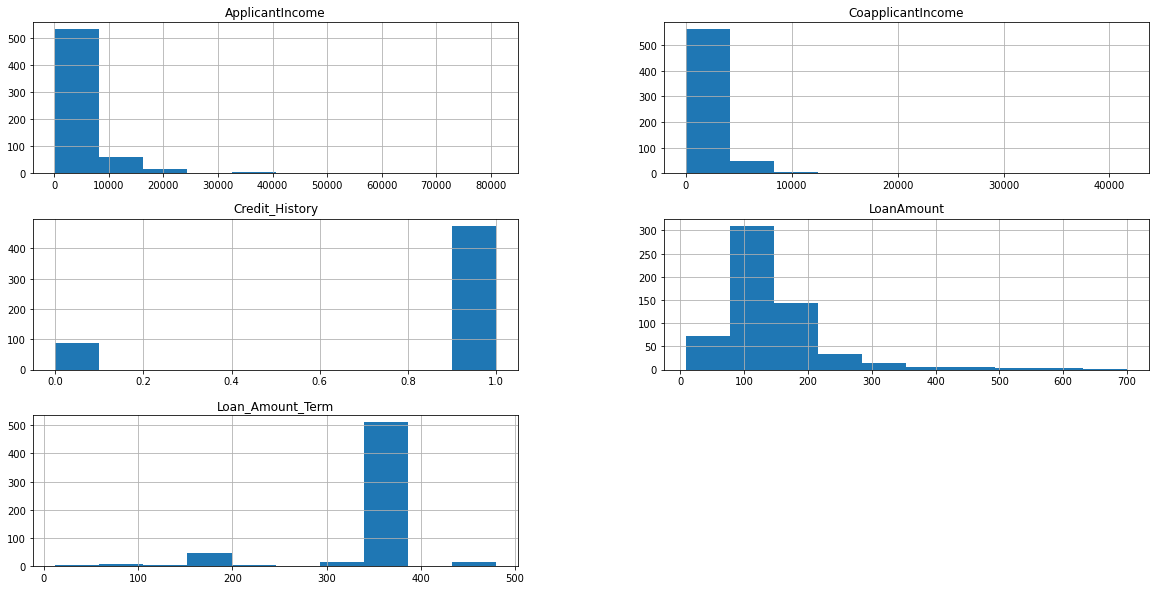

In [0]:
df.hist(figsize=[20,10])

Observations:
1. Almost 525 out of 614 applicants earn less than 10,000 which shows that the people earining less tends to apply for loan more.
2. Majority of Coapplicants also earn less than 10,000 which shows alongwith the 1st observation that, payback will be quite risky for the loan amount.
3. About 10-11 % (60-65) applicants have no credit history.
4. Most of the loan amount ranges between 80-220 which is quite less than the average of the loan amount a bank can gave, so it tells that the bank can give loan to many people.
5. the tern for the loan paybak mostly ranges between 350-390 days which is a long term for the credit for the bank.

Bar plots for non-numeric columns

Text(0, 0.5, 'Number of Applicants')

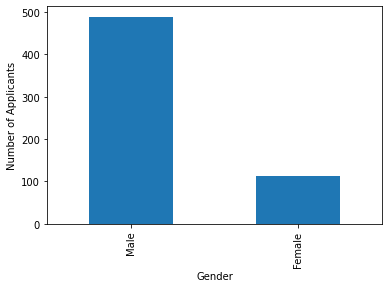

In [0]:
a=df.Gender.value_counts().plot.bar()
a.set_xlabel('Gender')
a.set_ylabel('Number of Applicants')

Observation: Males tends to apply for loans far more than the females. The difference is of almost 80-82 %.

Text(0, 0.5, 'Number of Applicants')

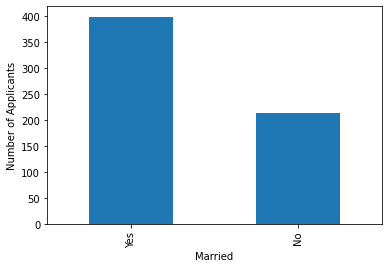

In [0]:
b=df.Married.value_counts().plot.bar()
b.set_xlabel('Married')
b.set_ylabel('Number of Applicants')

Observation: Married people tends to apply for loan more than the unmarried.

Text(0, 0.5, 'Number of Applicants')

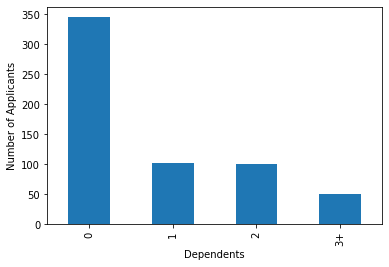

In [0]:
c=df.Dependents.value_counts().plot.bar()
c.set_xlabel('Dependents')
c.set_ylabel('Number of Applicants')

Observation: Those who are independent that is depended only on themselves are given more loans.

Text(0, 0.5, 'Number of Applicants')

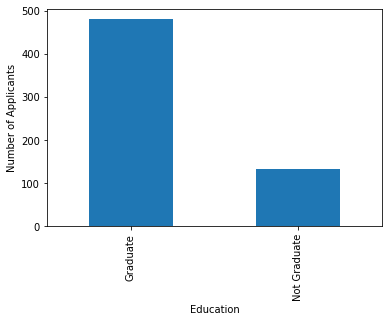

In [0]:
d=df.Education.value_counts().plot.bar()
d.set_xlabel('Education')
d.set_ylabel('Number of Applicants')

Observation: Graduate people apply for more loan than non-graduates.

Text(0, 0.5, 'Number of Applicants')

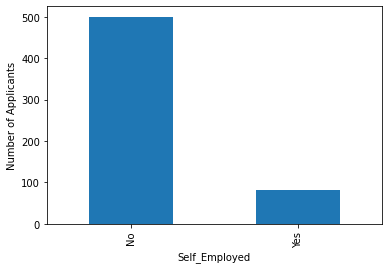

In [0]:
e=df.Self_Employed.value_counts().plot.bar()
e.set_xlabel('Self_Employed')
e.set_ylabel('Number of Applicants')

Observation: those who aren't self employed will be given more loan almost 80-82 % that means they can pay easily as they have stable earning resources.

Text(0, 0.5, 'Number of Applicants')

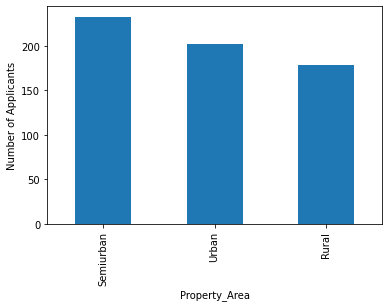

In [0]:
f=df.Property_Area.value_counts().plot.bar()
f.set_xlabel('Property_Area')
f.set_ylabel('Number of Applicants')

Observation: There is not musch difference between the applicants having property in semiurban, urban and rural areas which is an asset for the applicant.

Text(0, 0.5, 'Number of Applicants')

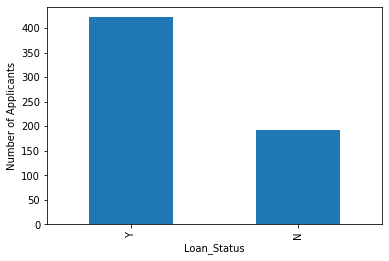

In [0]:
g=df.Loan_Status.value_counts().plot.bar()
g.set_xlabel('Loan_Status')
g.set_ylabel('Number of Applicants')

Loan_Status is the target variable, so its univariate just tells whether how many applicants are getting loan or not

**4. Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations**

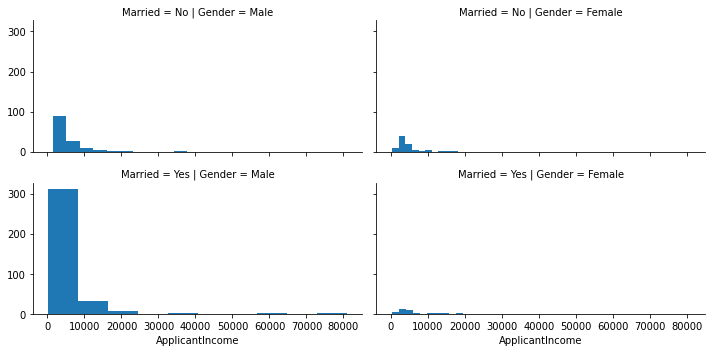

In [0]:
i=sns.FacetGrid(df,col='Gender',row='Married',palette="GnBu_d",gridspec_kws={"width_ratios": [4, 4]}, height=2.5,aspect=2)
i=i.map(plt.hist,"ApplicantIncome")

Observation: Married Males have more income and it an be of less risk for the bank to give loans to married males. On the other hand, married females will be very risky to give loan as they have far less income and will be problematic during payback.

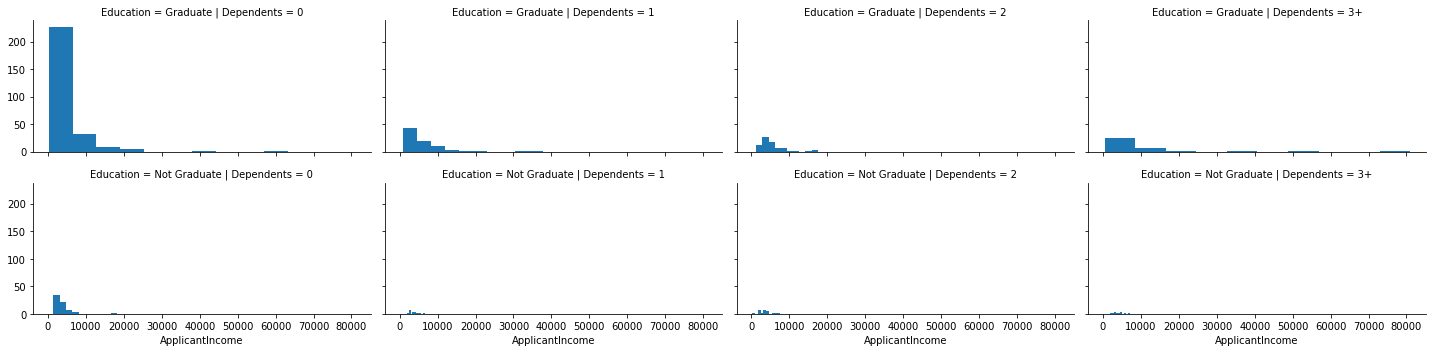

In [0]:
i=sns.FacetGrid(df,col='Dependents',row='Education', height=2.5,aspect=2)
i=i.map(plt.hist,"ApplicantIncome")

Observation: Independent Graduates have more income than the others, and hence they can be safe to give loans. While on the other hands, not graduates, with many dependencies have very less income and can be risky ot give loans as ti would raise a concerning issue while payback.

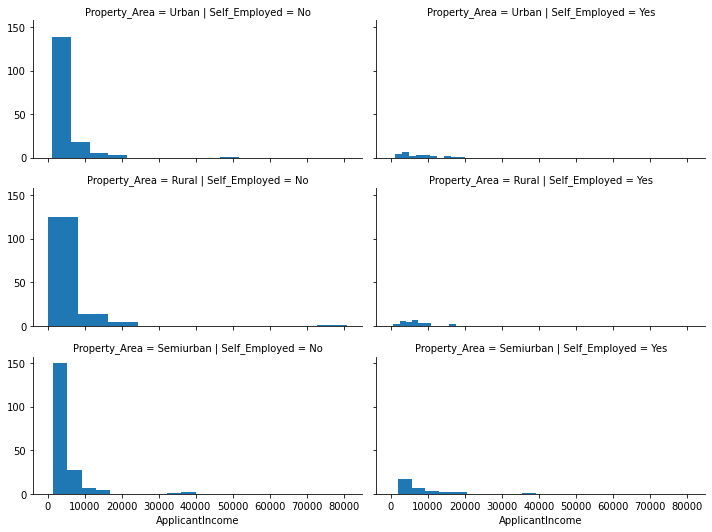

In [0]:
i=sns.FacetGrid(df,col='Self_Employed',row='Property_Area',palette="GnBu_d",gridspec_kws={"width_ratios": [4, 4]}, height=2.5,aspect=2)
i=i.map(plt.hist,"ApplicantIncome")

Observation: Applicants who are self employed having property in any area have very less income and can be risky to give loan and can be problematic during payback.

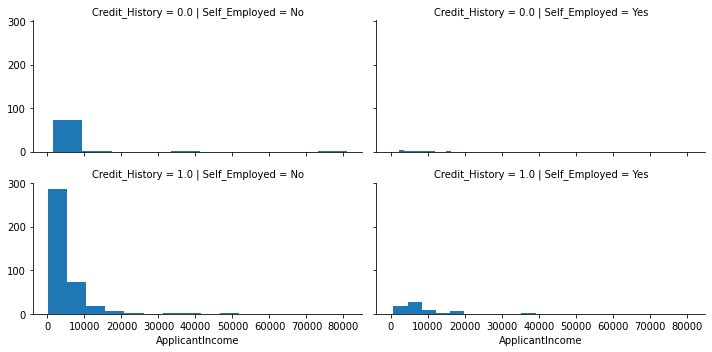

In [0]:
i=sns.FacetGrid(df,col='Self_Employed',row='Credit_History',palette="GnBu_d",gridspec_kws={"width_ratios": [4, 4]}, height=2.5,aspect=2)
i=i.map(plt.hist,"ApplicantIncome")

Observation: =Credit_History and Self_Employed are not related at all.

**5. Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc**

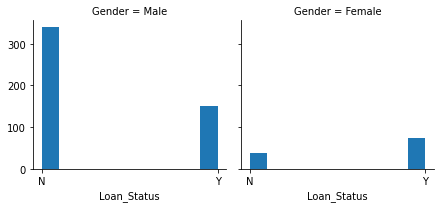

In [0]:
h=sns.FacetGrid(df,col='Gender',col_wrap=4,height=3)
h=h.map(plt.hist,'Loan_Status')

Compared to the total applied males, they are rejected more for the loans.
Compared to the total applied females, they are accepted more for the loans.

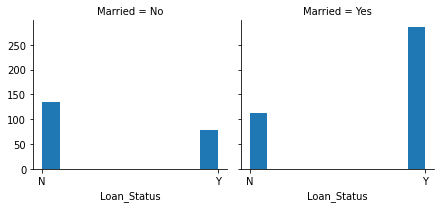

In [0]:
h=sns.FacetGrid(df,col='Married',col_wrap=4,height=3)
h=h.map(plt.hist,'Loan_Status')

Loans for the married applicant are accepted more.

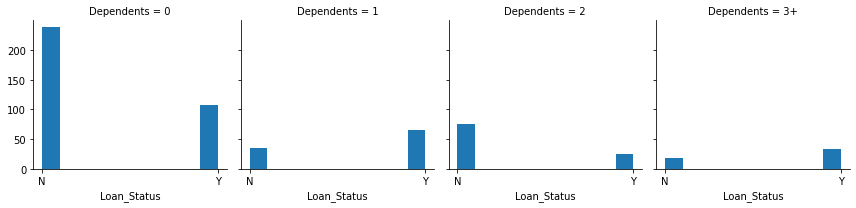

In [0]:
h=sns.FacetGrid(df,col='Dependents',col_wrap=4,height=3)
h=h.map(plt.hist,'Loan_Status')

Those having no dependency at all are rejected for having the loan.

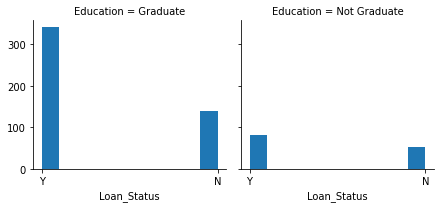

In [0]:
h=sns.FacetGrid(df,col='Education',col_wrap=4,height=3)
h=h.map(plt.hist,'Loan_Status')

Graduates loan application is approved moe caompared to the non-graduates.

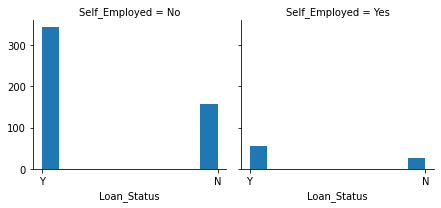

In [0]:
h=sns.FacetGrid(df,col='Self_Employed',col_wrap=4,height=3)
h=h.map(plt.hist,'Loan_Status')

Self_employed loan requests accepted more.

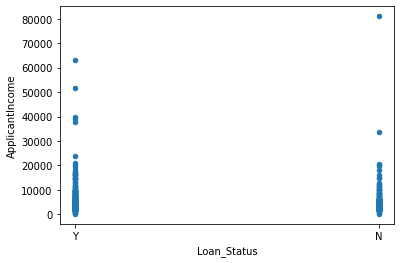

In [0]:
df.plot.scatter(x='Loan_Status',y='ApplicantIncome')

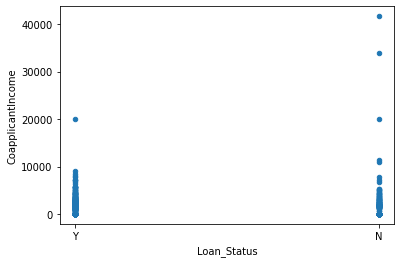

In [0]:
df.plot.scatter(x='Loan_Status',y='CoapplicantIncome')

AxesSubplot(0.125,0.125;0.775x0.755)


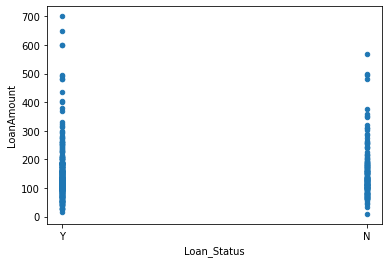

In [0]:
print(df.plot.scatter(x='Loan_Status',y='LoanAmount'))

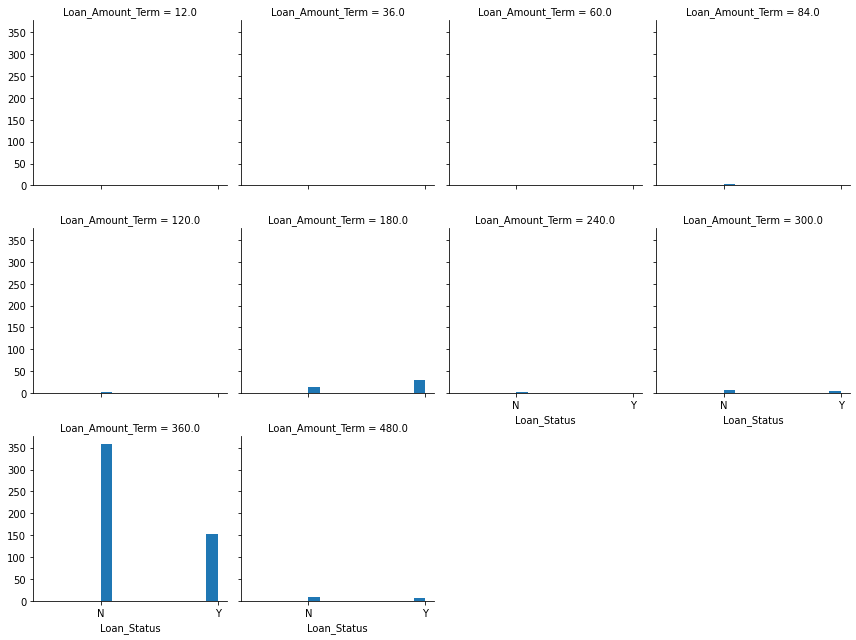

In [0]:
h=sns.FacetGrid(df,col='Loan_Amount_Term',col_wrap=4,height=3)
h=h.map(plt.hist,'Loan_Status')

Applicant having loan amount term= 360 are rejected as it'll be a long term credibility for the bank.

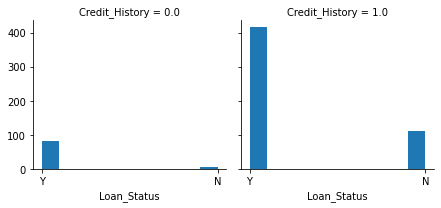

In [0]:
h=sns.FacetGrid(df,col='Credit_History',col_wrap=4,height=3)
h=h.map(plt.hist,'Loan_Status')

Applicants with a credit history will be granted loan.

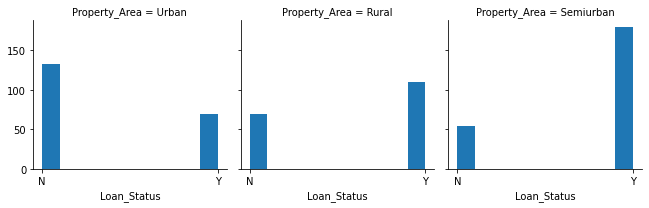

In [0]:
h=sns.FacetGrid(df,col='Property_Area',col_wrap=4,height=3)
h=h.map(plt.hist,'Loan_Status')

Applicants having land in semi urban area will be granted more loan.

**6. How is the class distribution (Y/N) in Label(Target) Variable ?**

In [0]:
df_LS=df.groupby(df.Loan_Status).count()
df_LS

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
N,192,192,186,192,183,192,192,181,186,192,192
Y,422,419,413,422,399,422,422,411,414,422,422


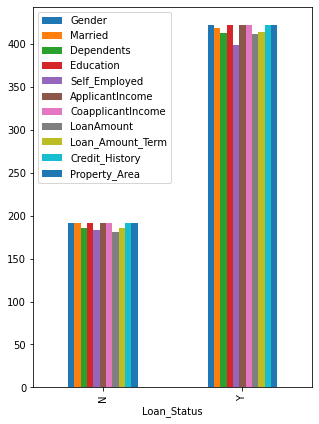

In [0]:
df_LS.plot.bar(figsize=[5,7])

**7. Identify the Independent Variables that have missing values.**



There are many ways to identify the independent variables. One of them are:

1. Missing data heatmap

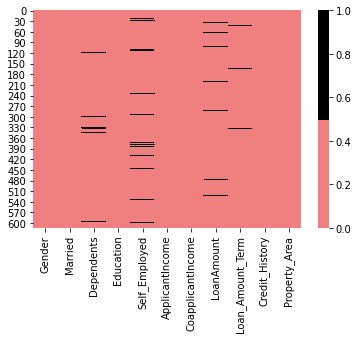

In [0]:
cols = df.columns[:11]
colours = ['#F08080', '#000000'] # specify the colours - black is missing. pink is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

From the above heatmap we can see that Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History has missing values.

**8. Handle missing values appropriately , explain the technique applied for each case**

From the above heatmap, we can see that, Credit_History have so many missing values, so here, I'm handling the missing values in the Credit_history by replacing it with the median.

Impute the observation
replace missing values with the median

In [0]:
for v in df['Credit_History']:
    print(v)
med = df['Credit_History'].median()
print("Median")
print(med)
df['Credit_History'] = df['Credit_History'].fillna(med)
print("values after imputing")
for k in df['Credit_History']:
    print(k)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
0.0
1.0
1.0
0.0
1.0
0.0
0.0
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
nan
1.0
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
0.0
1.0
1.0
nan
1.0
1.0
0.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
nan
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
nan
1.0
1.0
1.0
1.0
0.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
nan
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


**9. Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)**


In [0]:
df['ApplicantIncome'].describe()
#0th percentile=min, 100th percentile=max

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [0]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [0]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [0]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [0]:
df['Credit_History'].describe()

count    614.000000
mean       0.855049
std        0.352339
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

**10. Use Box-Plot chart to represent the Outliers for each Independent Variable**

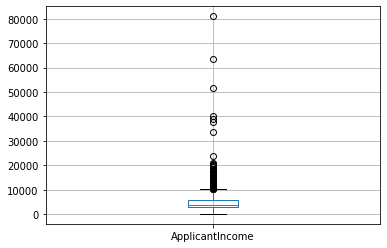

In [0]:
df.boxplot(column=['ApplicantIncome'])

There are 8 outliers in ApplicantIncome

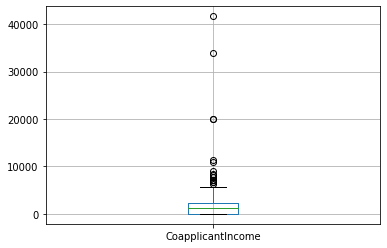

In [0]:
df.boxplot(column=['CoapplicantIncome'])

There are about 3 outliers in CoapplicantIncome

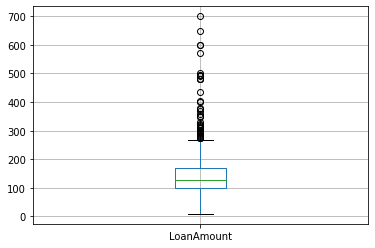

In [0]:
df.boxplot(column=['LoanAmount'])

4 outliers are visible in LoanAmount

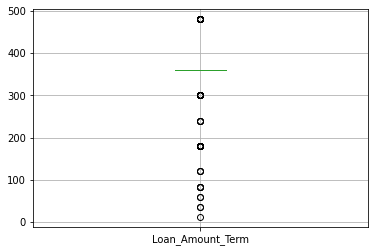

In [0]:
df.boxplot(column=['Loan_Amount_Term'])

1 outlier is present in Loan_Amount_Term

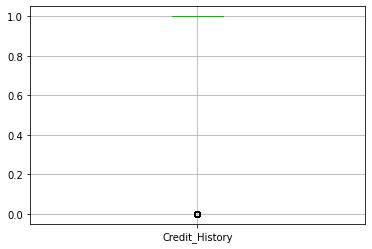

In [0]:
df.boxplot(column=['Credit_History'])

There is no Outlier in Credit_History

In [0]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**11. Perform treatment of these Outliers using appropriate techniqies.Explain your approach**

In [0]:
q1=df.quantile(0.1)
q3=df.quantile(0.9)
iqr=q3-q1
cutoff=1.5*iqr
lower=q1-cutoff
upper=q3+cutoff
((df<lower)|(df>upper)).sum()

ApplicantIncome      10
CoapplicantIncome     6
Credit_History        0
Dependents            0
Education             0
Gender                0
LoanAmount            9
Loan_Amount_Term     71
Loan_Status           0
Married               0
Property_Area         0
Self_Employed         0
dtype: int64

In [0]:
df1=df[~(((df<lower)|(df>upper))).any(axis=1)]

In [0]:
df.shape

(614, 12)

In [0]:
df1.shape

(526, 12)

**Step 1 -**

**Perform Label Encoding on Target Variable (Loan_Status).**

In [0]:
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


**Step 2- Using dataframe from Step 1:**

Perform Label Encoding on Categorical Independent Variables.

In [0]:
categoricalcolumns = [i for i in df if len(df[i].unique())<=5]
categoricalcolumns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [0]:
enc=df.copy()
import numpy as np
for col in enc.columns:
  missingPercent = np.mean(enc[col].isnull())
  if round(missingPercent*100) >0:
    missingValues = df[col].isnull().sum().sum()
    print("Column {} with mean {} with missing values  {}".format(col,int(round(missingPercent*100)),missingValues))
# enc['Gender']=le.fit_transform(enc['Gender'])

Column Gender with mean 2 with missing values  13
Column Dependents with mean 2 with missing values  15
Column Self_Employed with mean 5 with missing values  32
Column LoanAmount with mean 4 with missing values  22
Column Loan_Amount_Term with mean 2 with missing values  14
Column Credit_History with mean 8 with missing values  50


In [0]:
enc['Gender']=enc.Gender.fillna(enc["Gender"].value_counts().nlargest(n=1).index[0])
enc = enc.fillna(0)
for col in enc.columns:
  missingPercent = np.mean(enc[col].isnull())
  if round(missingPercent*100) >0:
    missingValues = df[col].isnull().sum().sum()
    print("Column {} with mean {} with missing values  {}".format(col,int(round(missingPercent*100)),missingValues))
#No more missing values

In [0]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [0]:
enc['Gender']=le.fit_transform(enc['Gender'])

In [0]:
enc['Married']=le.fit_transform(enc['Married'])

In [0]:
enc['Dependents']=le.fit_transform(enc['Dependents'])

In [0]:
enc['Education']=le.fit_transform(enc['Education'])

In [0]:
enc['Self_Employed']=le.fit_transform(enc['Self_Employed'])

In [0]:
enc['Credit_History']=le.fit_transform(enc['Credit_History'])

In [0]:
enc['Property_Area']=le.fit_transform(enc['Property_Area'])

In [0]:
enc

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,1,5849,0.0,0.0,360.0,1,1,1
1,1,1,1,1,1,4583,1508.0,128.0,360.0,1,1,0
2,1,1,1,1,1,3000,0.0,66.0,360.0,1,1,1
3,1,1,1,1,1,2583,2358.0,120.0,360.0,1,1,1
4,1,1,1,1,1,6000,0.0,141.0,360.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,0,0,1
610,1,1,1,1,1,4106,0.0,40.0,180.0,1,1,1
611,1,1,1,1,1,8072,240.0,253.0,360.0,1,1,1
612,1,1,1,1,1,7583,0.0,187.0,360.0,1,1,1


**What is the shape of dataframe post Categorical Encoding ?**

In [0]:
enc.shape

(614, 12)

**Carry out Correlation analysis on this dataframe. Plot using HeatMap**

In [0]:
corr = enc.corr()
corr.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,1.000000,1.000000,1.000000,1.000000,0.058809,0.082912,0.095586,-0.049785,1.000000,1.000000,0.017987
Married,1.000000,1.000000,1.000000,1.000000,1.000000,0.058809,0.082912,0.095586,-0.049785,1.000000,1.000000,0.017987
Dependents,1.000000,1.000000,1.000000,1.000000,1.000000,0.058809,0.082912,0.095586,-0.049785,1.000000,1.000000,0.017987
Education,1.000000,1.000000,1.000000,1.000000,1.000000,0.058809,0.082912,0.095586,-0.049785,1.000000,1.000000,0.017987
Self_Employed,1.000000,1.000000,1.000000,1.000000,1.000000,0.058809,0.082912,0.095586,-0.049785,1.000000,1.000000,0.017987
ApplicantIncome,0.058809,0.058809,0.058809,0.058809,0.058809,1.000000,-0.116605,0.538290,-0.015645,0.058809,0.058809,-0.004710
CoapplicantIncome,0.082912,0.082912,0.082912,0.082912,0.082912,-0.116605,1.000000,0.190377,-0.050321,0.082912,0.082912,-0.059187
LoanAmount,0.095586,0.095586,0.095586,0.095586,0.095586,0.538290,0.190377,1.000000,0.058519,0.095586,0.095586,-0.010631
Loan_Amount_Term,-0.049785,-0.049785,-0.049785,-0.049785,-0.049785,-0.015645,-0.050321,0.058519,1.000000,-0.049785,-0.049785,0.007306
Credit_History,1.000000,1.000000,1.000000,1.000000,1.000000,0.058809,0.082912,0.095586,-0.049785,1.000000,1.000000,0.017987


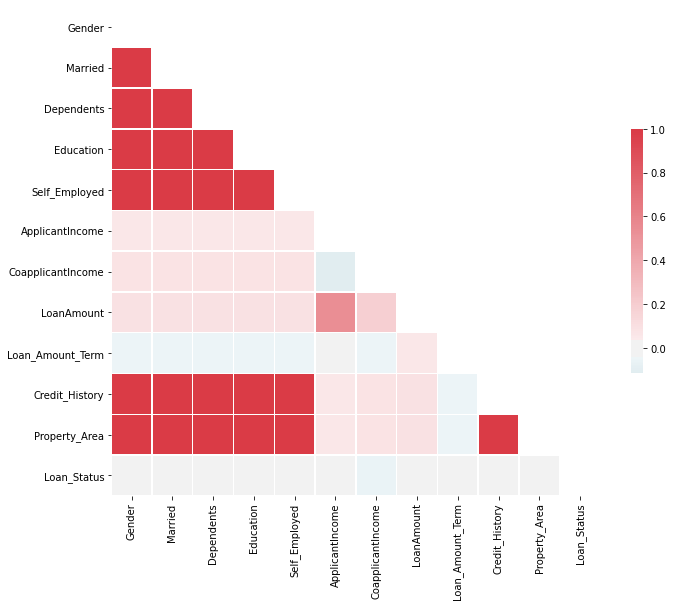

In [0]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

**Identify the variables that have strong correlation using Label Encoding( Correlation Coefficient > 0.5 or <0.5)**

Married:Gender, Dependents:Gender. Education:Gender, Self_Employed:Gender, Credit_History:Gender, Dependents:Married, Education:Married, Self_Employed:Married, Credit_History:Married, Education:Dependents, Self_Employed:Dependents, Credit_History:Dependents, Self_Employed:Education, Credit_History:Education, Credit_History:Self_Employed, Loan_Amount:ApplicantIncome are the strong correlation as CorrelationCoefficient > 0.5

**Step 3 - Using dataframe from Step 1:**

Perform One Hot Encoding on Categorical Independent Variables

In [0]:
df_ohe=df.copy()
ohe = OneHotEncoder(handle_unknown='ignore')
print(categoricalColumns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']


In [0]:
df_ohe.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [0]:
df_ohe['Gender']=df_ohe['Gender'].fillna(df["Gender"].value_counts().nlargest(n=1).index[0])
df_ohe.Gender.isnull().sum()
df_ohe = df_ohe.fillna(0)

In [0]:
df_ohe['Self_Employed'].replace({0:"No"},inplace=True)
df_ohe['Married'].replace({0:"No"},inplace=True)
df_ohe['Dependents'].replace({"3+":'3',0:'0'},inplace=True)

In [0]:
for i in categoricalcolumns:
  print("{} column encoded".format(i))
  enc_rel = pd.DataFrame(ohe.fit_transform(df_ohe[[i]]).toarray())
  enc_rel = enc_rel.add_prefix(i+"_")
  df_ohe = df_ohe.join(enc_rel)
  df_ohe = df_ohe.drop(i,axis=1)

Gender column encoded
Married column encoded
Dependents column encoded
Education column encoded
Self_Employed column encoded
Credit_History column encoded
Property_Area column encoded
Loan_Status column encoded


In [0]:
df_ohe.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Gender_0             0
Gender_1             0
Married_0            0
Married_1            0
Dependents_0         0
Dependents_1         0
Dependents_2         0
Dependents_3         0
Education_0          0
Education_1          0
Self_Employed_0      0
Self_Employed_1      0
Credit_History_0     0
Credit_History_1     0
Property_Area_0      0
Property_Area_1      0
Property_Area_2      0
Loan_Status_0        0
Loan_Status_1        0
dtype: int64

In [407]:
df_ohe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_0,Gender_1,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Credit_History_0,Credit_History_1,Property_Area_0,Property_Area_1,Property_Area_2,Loan_Status_0,Loan_Status_1
0,5849,0.0,0.0,360.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,4583,1508.0,128.0,360.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,3000,0.0,66.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,2583,2358.0,120.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,6000,0.0,141.0,360.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


**What is the shape of dataframe post OHE Encoding ?**

In [408]:
df_ohe.shape

(614, 23)

**Carry out Correlation analysis on this dataframe. Plot using HeatMap**

In [411]:
corr_ohe = df_ohe.corr()
corr_ohe.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_0,Gender_1,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Credit_History_0,Credit_History_1,Property_Area_0,Property_Area_1,Property_Area_2,Loan_Status_0,Loan_Status_1
ApplicantIncome,1.000000,-0.116605,0.538290,-0.015645,-0.058809,0.058809,-0.050194,0.050194,-0.092599,0.040861,-0.034650,0.156687,0.140760,-0.140760,-0.127180,0.127180,-0.006986,0.006986,0.015829,-0.014246,-0.000598,0.004710,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.190377,-0.050321,-0.082912,0.082912,-0.080496,0.080496,-0.008292,-0.029769,0.010016,0.041491,0.062290,-0.062290,0.016100,-0.016100,0.058795,-0.058795,0.005329,-0.027044,0.022776,0.059187,-0.059187
LoanAmount,0.538290,0.190377,1.000000,0.058519,-0.095586,0.095586,-0.140023,0.140023,-0.141048,0.056815,0.023105,0.144048,0.173244,-0.173244,-0.109154,0.109154,0.032711,-0.032711,0.043534,0.010772,-0.053234,0.010631,-0.010631
Loan_Amount_Term,-0.015645,-0.050321,0.058519,1.000000,0.049785,-0.049785,0.079926,-0.079926,0.037666,-0.043942,0.036037,-0.056365,0.108857,-0.108857,0.029185,-0.029185,-0.050145,0.050145,0.028186,0.080393,-0.110293,-0.007306,0.007306
Gender_0,-0.058809,-0.082912,-0.095586,0.049785,1.000000,-1.000000,0.367389,-0.367389,0.148421,0.004466,-0.129953,-0.096319,0.045364,-0.045364,-0.000525,0.000525,0.026655,-0.026655,-0.080283,0.108623,-0.034530,0.017987,-0.017987
Gender_1,0.058809,0.082912,0.095586,-0.049785,-1.000000,1.000000,-0.367389,0.367389,-0.148421,-0.004466,0.129953,0.096319,-0.045364,0.045364,0.000525,-0.000525,-0.026655,0.026655,0.080283,-0.108623,0.034530,-0.017987,0.017987
Married_0,-0.050194,-0.080496,-0.140023,0.079926,0.367389,-0.367389,1.000000,-1.000000,0.355644,-0.118052,-0.253280,-0.135217,0.017671,-0.017671,0.008491,-0.008491,-0.023626,0.023626,0.000220,0.000229,-0.000449,0.084281,-0.084281
Married_1,0.050194,0.080496,0.140023,-0.079926,-0.367389,0.367389,-1.000000,1.000000,-0.355644,0.118052,0.253280,0.135217,-0.017671,0.017671,-0.008491,0.008491,0.023626,-0.023626,-0.000220,-0.000229,0.000449,-0.084281,0.084281
Dependents_0,-0.092599,-0.008292,-0.141048,0.037666,0.148421,-0.148421,0.355644,-0.355644,1.000000,-0.531373,-0.528246,-0.358315,0.036563,-0.036563,0.088254,-0.088254,-0.019743,0.019743,0.044015,-0.004173,-0.038264,0.003044,-0.003044
Dependents_1,0.040861,-0.029769,0.056815,-0.043942,0.004466,-0.004466,-0.118052,0.118052,-0.531373,1.000000,-0.198046,-0.134337,0.013355,-0.013355,-0.082044,0.082044,0.030415,-0.030415,-0.084117,0.011661,0.069320,0.038740,-0.038740


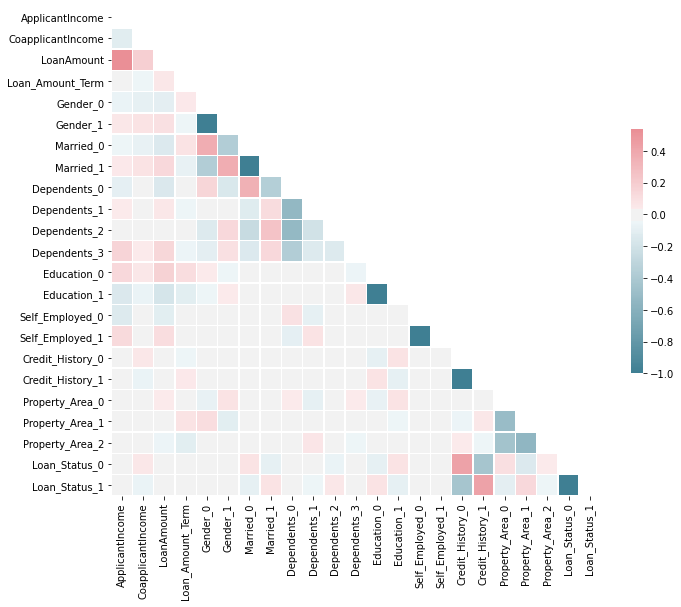

In [412]:
mask = np.zeros_like(corr_ohe, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(corr_ohe, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

**Identify the variables that have strong correlation using OHE ( Correlation Coefficient > 0.5 or <0.5)**

LoanAmount:ApplicantIncome, Loan_Status_0:Credit_History_0, Loan_Status_1:Credit_History_1 are the strong correlations.